![title](Title_Image.jpg)

# Abstract

Social Butterfly is a social media engagement software project which is a part of the NEU AI Skunkworks Project team. We propose to create a software that performs the task of content optimization and then publishes the same optimized content on one or more social media platform (viz. Twitter, Skunkworks, Instagram etc.). Publishing content on social media is the fastest way to reach audience so the content that should be posted and the timing at which it should be posted is of prime importance. Finding new content is incredibly hard, we are also proposing to employ machine learning methods to create new content after training the models on the given data. These are the two major tasks that we propose to tackle in our Project. 

## Importing Libraries

In [127]:
import json
import tweepy
import csv

import numpy as np
import pandas as pd
from pandas.io.json import json_normalize 

%config InlineBackend.figure_format = 'retina' # high resolution plotting
import matplotlib.pyplot as plt

import re

import nltk
from nltk.corpus import stopwords

import advertools as adv

twitter_cred = dict()

twitter_cred['CONSUMER_KEY'] = '17XHiftb4Iu5hVAIh4NacWj9S'
twitter_cred['CONSUMER_SECRET'] = '8xAXhFsfnkiFjSFO5THqRO5J8x8lKSzC9J2GNPUSY7ZPb5z6Qv'
twitter_cred['ACCESS_KEY'] = '1392379572-FInzXaziEqyNCGc8jqtU9LwnFFlHYRpjoihZpiX'
twitter_cred['ACCESS_SECRET'] = 'JBDveSiUU6aXpwx8QkxYhXloDr9DyHn7ocqrqgWqwqctw'

In [2]:
with open('twitter_credentials.json', 'w') as secret_info:
    json.dump(twitter_cred, secret_info, indent=4, sort_keys=True)

In [3]:
with open('twitter_credentials.json') as cred_data:
    info = json.load(cred_data)
    consumer_key = info['CONSUMER_KEY']
    consumer_secret = info['CONSUMER_SECRET']
    access_key = info['ACCESS_KEY']
    access_secret = info['ACCESS_SECRET']

# Create the api endpoint

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)
api = tweepy.API(auth, wait_on_rate_limit=True)

### Taking the user input for number of tweets and the hastag to collect the metadata

In [4]:
def tweet_scrapped():
    maximum_number_of_tweets_to_be_extracted = \
    tweet_number=int(input('Enter the number of tweets that you want to extract- '))
    return tweet_number
def Hashtag_used():
    hashtag=str(input('Enter the hashtag you want to scrape- '))
    return hashtag

### Scraping the tweets and saving in a json file

In [5]:
def scrap_tweets(hashtag,tweet_number):
    all_the_tweets = [] 
    with open('output_json.json', 'w') as outfile:
        
        for tweet in tweepy.Cursor(api.search, q='#' + hashtag,rpp=400, tweet_mode='extended').items(tweet_number):
            #if (not tweet.retweeted) :
             if (not tweet.retweeted) and ('RT @' not in tweet.full_text):
                json.dump(tweet._json, outfile, indent=2) 
                outfile.write('\n')
                all_the_tweets.append(tweet)
               
    #with open('tweets_with_hashtag_' + hashtag + '.txt', 'a') as the_file:
        #the_file.write(str(tweet.text.encode('utf-8')) + '\n')
    #data=process_or_store(tweet._json)
    #get_tweets()
      

    print ('Extracted ' + str(tweet_number) + ' tweets with hashtag #' + hashtag)
    #print(all_the_tweets)
    return all_the_tweets

### Selecting the tweet entities to gain an insight for sentiment analysis

In [7]:
def out_tweets(tweets_scrapped):
    
    outtweets = [[tweet.id_str, tweet.created_at,tweet.full_text.encode('utf-8').decode("utf-8"),tweet.user.name,tweet.user.screen_name,tweet.user.friends_count,tweet.user.followers_count,tweet.retweet_count,tweet.favorite_count,tweet.entities.get('hashtags')] for tweet in tweets_scrapped]
    return outtweets
        

# Generating a CSV for tweets

In [8]:
def csv_tweets(outtweets,hashtag):
    tweet_csv_name=' tweets with hashtag #' + hashtag+'.csv'
    with open(tweet_csv_name, 'w', encoding='utf8') as f:
        writer = csv.writer(f)
        writer.writerow(['id', 'created_at', 'text','user','screen_name','friends_count','followers_count','retweet_count','favorite_count','Hashtags'])
    
        writer.writerows(outtweets)

In [9]:
tweet_number=int(tweet_scrapped())

Enter the number of tweets that you want to extract- 2500


In [25]:
hashtag=str(Hashtag_used())

Enter the hashtag you want to scrape- DataScience


In [26]:
tweets_scrapped=scrap_tweets(hashtag,tweet_number)

Extracted 2500 tweets with hashtag #DataScience


In [27]:
outtweets=out_tweets(tweets_scrapped)

In [28]:
csv_tweets(outtweets,hashtag)

In [29]:
# def remove_emoji(string):
#     emoji_pattern = re.compile("[" u"\U0001F600-\U0001F64F"  # emoticons 
#                                 u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                                 u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                                 u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                                 u"\U00002702-\U000027B0"
#                                 u"\U000024C2-\U0001F251"
#                                 u"\U0001f926-\U0001f937"
#                                 u'\U00010000-\U0010ffff'
#                                 u"\u200d"
#                                 u"\u2640-\u2642"
#                                 u"\u2600-\u2B55"
#                                 u"\u23cf"
#                                 u"\u23e9"
#                                 u"\u231a"
#                                 u"\u3030"
#                                 u"\ufe0f"
#                                 "]+", flags=re.UNICODE)
#     return emoji_pattern.sub(r'', string)

### Converting the csv files to dataframes 

We are doing this for three hashtags here:- AI, ML and DataScience

In [30]:
def dataframe(hashtag):
    tweet_csv_name=' tweets with hashtag #' + hashtag+'.csv'
    dataset=pd.read_csv(tweet_csv_name,encoding="ISO-8859-1")
    return dataset

In [17]:
dataset_1=dataframe('AI')

In [24]:
dataset_2=dataframe('ML')

In [31]:
dataset_3=dataframe('DataScience')

### Functions to remove hashtags and other entities in the text ('@', 'â'..)

In [110]:
regexp = {"HASHTAG": r"(#[\w\d]+)"}
regexp = dict((key, re.compile(value)) for key, value in regexp.items())

#Function to remove hashtags in the text
def remove_hashtags(s):
    return re.findall(regexp["HASHTAG"], s)

#Function to extract hashtags from the text
def extract_hash_tags(s):
    my_set=set(part[1:] for part in s.split() if part.startswith('#'))
    my_list = list(my_set)
    return(my_list)

#Function to remove hashtags in the text and use it in a new column
def remove_hashtags_(x):
    if '#' in x:
        return str(x.replace('#',''))

#Function to remove symbols like @ and # in the text and use it in a new column
def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,'')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

#Function to remove symbols that are non-ascii (viz. 'â')
def removeNonAscii(s): return "".join(i for i in s if ord(i)<128)

#Function to call all above functions in one place
def column_text(dataset):
    dataset['text_1']=dataset['text'].apply(lambda row: row.encode('utf-8'))
    dataset['text_1']=dataset['text'].apply(lambda row: remove_emoji(row))
    dataset['Hashtags']=dataset['text'].apply(lambda row: remove_hashtags(row))
    dataset['text']=dataset['text'].apply(lambda row: removeNonAscii(row))
    list_trial=dataset['text'].apply(lambda row: remove_hashtags(row))
    dataset['Hashtags']=dataset['text'].apply(lambda row: extract_hash_tags(row))
    list_trial=dataset['Hashtags'].tolist()
    dataset['TextNoHashtags']=dataset['text'].apply(remove_hashtags_)
    dataset['TextNoMentions']=dataset['text'].apply(strip_all_entities)
    return(list_trial)

#
def hashtag_list(list_trial):
    #list_trial=list_trial.tolist()
    result_trial = list(x for l in list_trial for x in l)
    result_trial = list(map(lambda each:each.strip("#"), result_trial))
    result_set=set(result_trial)
    print (result_set)
    return (result_trial)   

#
def list_to_dict(result_trial_list):
    result_trial_list=[x.lower() for x in result_trial_list]
    data=dict((x,result_trial_list.count(x)) for x in set(result_trial_list))
    dataset_dict=pd.DataFrame.from_dict(data ,orient='index',columns=['Count'])
    return(data)

In [111]:
list_trial_1=column_text(dataset_1) #AI

In [112]:
list_trial_2=column_text(dataset_2) #ML

In [113]:
list_trial_3=column_text(dataset_3) #DataScience

In [114]:
#dataset['text']=dataset['text'].apply(lambda row: row.encode().decode())

In [115]:
#dataset_1.to_csv('dataset_1.csv')

In [116]:
result_trial_1=hashtag_list(list_trial_1) #with hashtag AI


{'', 'marketingstrategies', 'illustrator', 'asia', 'employee', 'Lurianic', 'NVIDIAQuadro', 'SVEF', 'Ransomware', 'Questions', 'Transportation', 'report', 'BusinessIntelligence', 'designer', 'SpeculativeFiction', 'cars', 'singularity', 'communities', 'BitcoinCash:', 'PitchNight', 'Recruiting', 'GartnerIO', 'WA:', 'charts', 'FutureOfWork', 'iot', 'collapse', 'hackers', 'accouting', 'WatsonMarketing', 'startups', 'healthcare', 'mauricedesignsforu', 'DATAx', 'innovations', 'delist', 'ml', 'transferlearning?', 'Free', 'elearning', 'networking', 'ComputerVision', 'disabilities', 'marketing.', 'thermal', 'userexperience', 'HCM', 'TheoSophy', 'Comfort', 'learn', 'berlin', 'Automotive', 'uyghur', 'Futureofretail', 'idol', 'np', 'fintech', 'SVEFs', 'nikkei', 'employment', 'InternetOfThi', 'CSO', 'LongLife', 'inclusion', 'bass', 'financialservices', 'trustworthy', 'YEDIGITAL', 'instablockchain', 'futureworkforce', 'discriminatory', 'SupplyChain', 'Interview', 'AI##IoT', 'success', 'Analytics', 'L

In [117]:
result_trial_2=hashtag_list(list_trial_2) #with hashtag ML

{'', 'MobileLegends', 'EarthAnalytics', 'RAD', 'jepang', 'Augmentation', 'Compliance', 'ESG', 'Questions', 'Autonomous', 'enterprise', 'DataScience?', 'HannoverMesse:', 'BusinessIntelligence', 'mhealth', 'sacos', 'Global', 'AML', 'Onedot', 'singularity', 'Disney', 'developer', 'ready', 'youtubers', 'proteam', 'emergingtechnology', 'bpc', 'BigQueryML', 'charts', 'Antivirus', 'OmarAlBashir', 'robotic', 'BiData', 'bettingtips', 'Robots)', 'FutureOfWork', 'Job', 'iot', 'spotmini', 'WatsonMarketing', 'consumers.', 'MLExpert', 'Naos', 'startups', 'Memory', 'days', 'healthcare', 'ApacheSpark', 'AITechnology:', 'edge', 'ml', 'oilandgas', 'highered', 'AdvancedAV', 'networking', 'freebets', 'Transparency', 'mm', 'ComputerVision', 'CPA', 'bisyarjogja', 'TechNews,', 'MECBot', 'MesesSinIntereses', 'BigQuery', 'mercadopago', 'memek', 'implants', 'fintech', 'material', 'employment', 'KNIME', 'smarthome', 'InfoSec', 'RealAngels', 'inclusion', 'mindcontrol', 'financialservices', 'technologynews', 'futu

In [118]:
result_trial_3=hashtag_list(list_trial_3) #with hashtag DataScience

{'', 'Information', 'meetups', 'Cloud', 'r', 'BI', 'time', 'olympics', 'influencer', 'IoT,', 'angularjs', 'DataEthics', 'node', 'statistics', 'Research', 'Attrition', 'machines', 'digitaltransformation', 'union', 'WIDSJeddah', 'UCSB', 'HR', 'regtech', 'CultureOfExperimentation', 'contentmarketing', 'artificialintelligehttps://t.co/PWOPjeuJjy', 'agroecology', 'Ransomware', 'Ebooks', 'IT', 'SomosATwist', 'NLProc', 'AIapplied', 'GCP', 'Serverless', 'Healthcare', 'DataScience?', 'BigData#stockstowatch', 'Physics', 'thisAintIt', 'ml,', 'BusinessIntelligence', 'UrbanAnalytics', 'DataAnalyticsReport', 'ASR', 'germany', 'mongodb', 'Analysis', 'Webinar:', 'OTTalk', 'Linkedin', 'GoodTechFest', 'JobVacancy', 'clippers', 'online', 'finance', 'sxsw', 'Networks', 'AutoTrader', '100daysofcode', 'blockChain', 'blackbox', 'developer', 'IoTJobs', 'IPO', 'TransferLearning', 'coding', 'AnimalFrontiers', 'Oregon', 'VPN', 'MotivationMonday', 'junkscience', 'java', 'Project?', 'science!', 'POI', 'DayTrading'

In [119]:
result_all_list=result_trial_1+result_trial_2+result_trial_3

## List of most occuring hashtags

In [120]:
a=list_to_dict(result_all_list)
for key, value in sorted(a.items(), key=lambda x: x[1], reverse=True):
    if value >= 100:
        print("{} : {}".format(key, value))
        

ai : 1737
ml : 999
datascience : 975
machinelearning : 732
bigdata : 570
deeplearning : 398
iot : 377
artificialintelligence : 313
dl : 283
analytics : 206
technology : 194
fintech : 183
tech : 173
data : 122
python : 117
nlp : 110
marketing : 104


## After doing the above steps we found a tool that does the same thing for us 

In [121]:
hashtag_summary = adv.extract_hashtags(dataset_1['text'])
hashtag_summary.keys()

dict_keys(['hashtags', 'hashtags_flat', 'hashtag_counts', 'hashtag_freq', 'top_hashtags', 'overview'])

In [122]:
hashtag_summary['overview']

{'num_posts': 833,
 'num_hashtags': 5023,
 'hashtags_per_post': 6.030012004801921,
 'unique_hashtags': 1332}

In [144]:
hashtag_summary['top_hashtags'][1:15]

[('#machinelearning', 151),
 ('#bigdata', 142),
 ('#iot', 128),
 ('#deeplearning', 88),
 ('#artificialintelligence', 86),
 ('#datascience', 83),
 ('#ml', 71),
 ('#technology', 48),
 ('#tech', 44),
 ('#fintech', 42),
 ('#analytics', 40),
 ('#business', 39),
 ('#marketing', 39),
 ('#digitalmarketing', 37)]

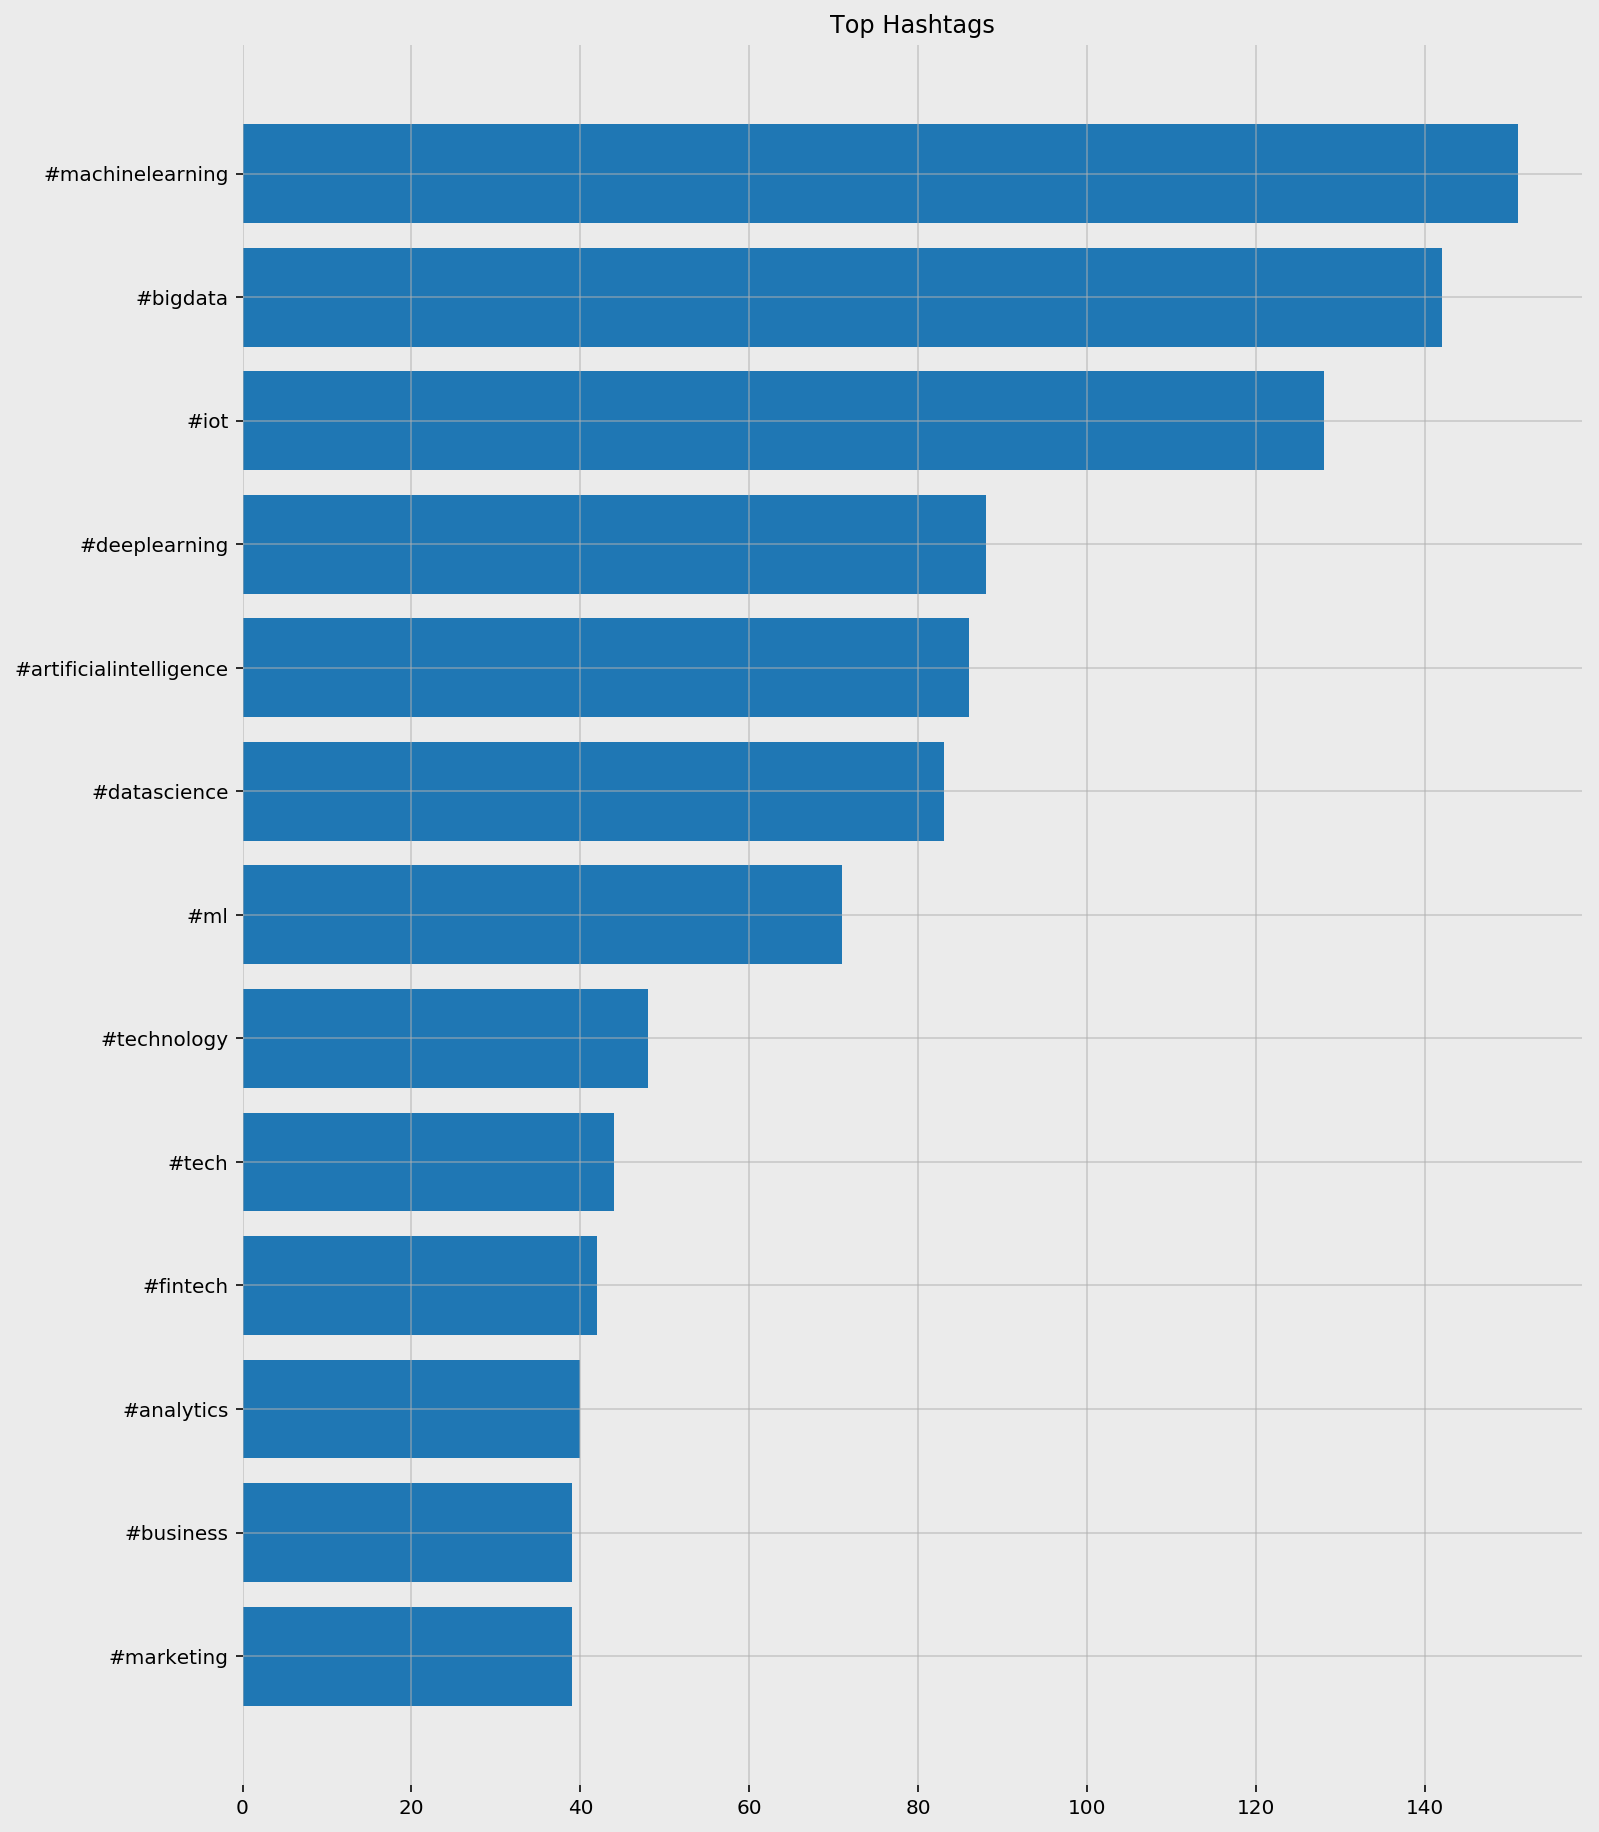

In [143]:
plt.figure(facecolor='#ebebeb', figsize=(12, 16))
plt.barh([x[0] for x in hashtag_summary['top_hashtags'][1:14]][::-1],
         [x[1] for x in hashtag_summary['top_hashtags'][1:14]][::-1])
plt.title('Top Hashtags')
plt.grid(alpha=0.6)
plt.gca().set_frame_on(False)

In [124]:
sorted(result_trial_1) == sorted(result_trial_2) #check whether list contains same value or not

False

# Citation:
1. https://github.com/abdulfatir/twitter-sentiment-analysis/blob/master/code/preprocess.py
2. https://stackoverflow.com/questions/8282553/removing-character-in-list-of-strings
3. https://github.com/bear/python-twitter/blob/master/twitter/parse_tweet.py
4. https://gist.github.com/dreikanter/2787146
5. https://docs.python.org/3.4/howto/unicode.html
6. https://www.kaggle.com/eliasdabbas/extract-entities-from-social-media-posts